<img src="https://datacube.remote-sensing.org/wp-content/uploads/2021/02/ci_logo_navbar.png" align="right" width='180' alt="eo_logo">

# Phenology Sentinel 2

### Import Python Packages

In [76]:
import datacube
import geopandas as gpd
from odc.ui import with_ui_cbk
import xarray as xr
import seaborn as sns
import hdstats
from deafrica_tools.bandindices import calculate_indices, dualpol_indices
from deafrica_tools.spatial import xr_rasterize
import pandas as pd

### Import the Datacube Configuration

In [58]:
dc = datacube.Datacube()

### AoI shapefile

<AxesSubplot:>

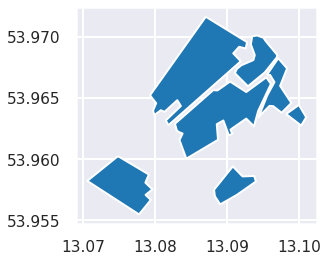

In [59]:
gdf = gpd.read_file('data/sample_fields.shp')
gdf.plot()

In [60]:
gdf.explore()

In [67]:
x = (gdf.total_bounds[0] , gdf.total_bounds[2] )
y  = (gdf.total_bounds[1] , gdf.total_bounds[3] )

In [70]:
ds = load_ard(dc=dc,
            products=['s2_l2a'],
            x= x,
            y= y,
            time = ("2021-01-01", "2021-12-31"), # specifiy time_extent
            output_crs = "EPSG:32632",
            measurements = ["blue","green","red", "nir_1"],
            resolution = (-10,10),
            group_by = "solar_day",
            mask_pixel_quality=True,
            data_coverage = 100,
            min_gooddata=0.90,    
             )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 15 out of 70 time steps with at least 90.0% good quality pixels
Applying pixel quality/cloud mask
Loading 15 time steps


## Calculate NDVI

In [16]:
ds = calculate_indices(ds, index=['NDVI'], collection='s2')

## Rasterize Fields

In [12]:
field_raster = xr_rasterize(gdf, ds, attribute_col="field_id")

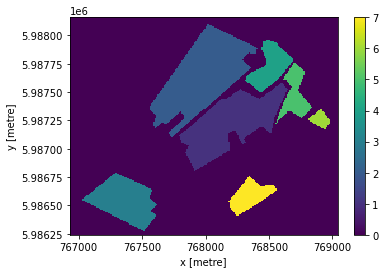

In [13]:
field_raster.plot()

In [20]:
field_1

<xarray.DataArray 'NDVI' (time: 18, y: 192, x: 211)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T10:25:50 ... 2020-10-28T10:...
  * y            (y) float64 5.988e+06 5.988e+06 ... 5.986e+06 5.986e+06
  * x            (x) float64 7.669e+05 7.669e+05 7.67e+05 ... 7.69e+05 7.69e+05
    spatial_ref  int32 32632

## Extract NDVI for one field

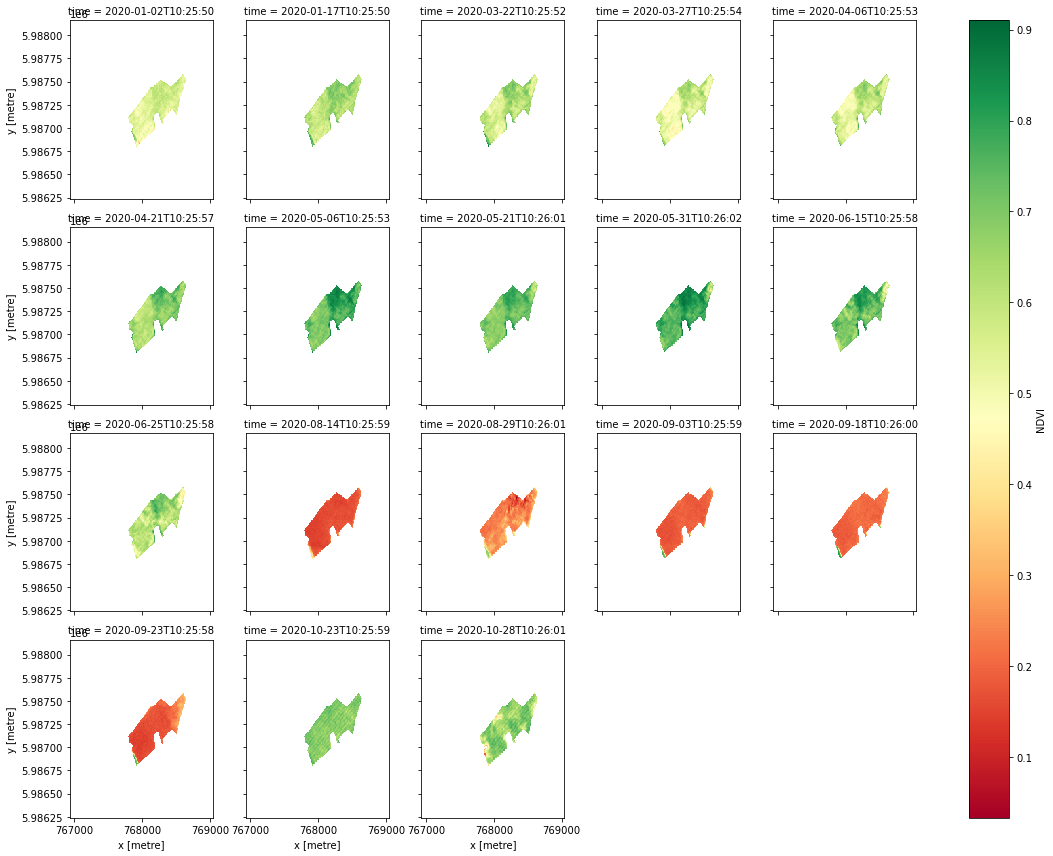

In [25]:
field_1 = ds.NDVI.where(field_raster == 1)
field_1.plot(col="time",col_wrap=5,cmap='RdYlGn')

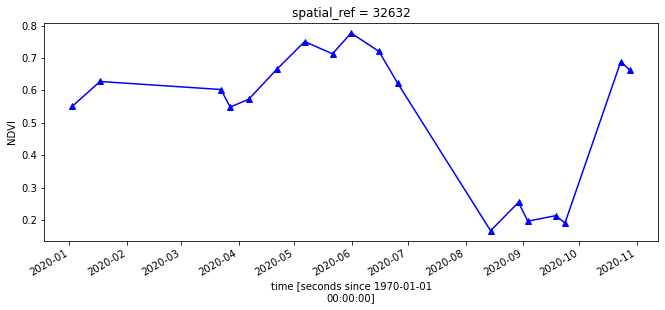

In [26]:
field_1.mean(['x', 'y']).plot.line('b-^', figsize=(11,4))

## Extract NDVI for all fields

In [31]:
data_frame = pd.DataFrame({"time": ds.time.values})
data_frame = data_frame.set_index('time')

for i in range(1,8):
    data_frame['field_' + str(i)] = ds.NDVI.where(field_raster == i).mean(['x', 'y']).values

data_frame

,field_1,field_2,field_3,field_4,field_5,field_6,field_7
time,,,,,,,
2020-01-02 10:25:50,0.550379,0.212372,0.670677,0.652998,0.520720,0.504339,0.503510
2020-01-17 10:25:50,0.627466,0.225250,0.734281,0.499110,0.616723,0.572611,0.600696
2020-03-22 10:25:52,0.602725,0.209477,0.671228,0.487316,0.759201,0.715385,0.651875
2020-03-27 10:25:54,0.548521,0.212633,0.659648,0.453140,0.710040,0.684396,0.624349
2020-04-06 10:25:53,0.572788,0.188432,0.694897,0.211895,0.729668,0.718128,0.694369
2020-04-21 10:25:57,0.664798,0.174301,0.751395,0.189179,0.767872,0.768793,0.802709
2020-05-06 10:25:53,0.750627,0.277465,0.806064,0.316318,0.871049,0.842044,0.803361
2020-05-21 10:26:01,0.712909,0.513417,0.787281,0.497535,0.821132,0.812557,0.731467
2020-05-31 10:26:02,0.776960,0.779466,0.830269,0.718046,0.894635,0.869531,0.804148


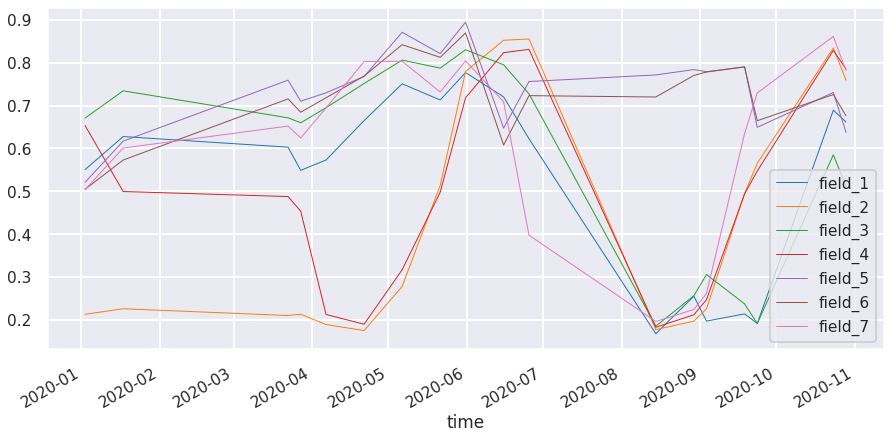

In [33]:
sns.set_style('darkgrid')
sns.set_context("poster", font_scale = .7)

ax = data_frame.plot(figsize=[15,7], linewidth=1)

### Calculate phenology statistics using xr_phenology

The DE Africa function xr_phenology can calculate a number of land-surface phenology statistics that together describe the characteristics of a plant’s lifecycle. The function can calculate the following statistics on either a zonal timeseries (like the one above), or on a per-pixel basis:

SOS = DOY of start of season

POS = DOY of peak of season

EOS = DOY of end of season

vSOS = Value at start of season

vPOS = Value at peak of season

vEOS = Value at end of season

Trough = Minimum value of season

LOS = Length of season (DOY)

AOS = Amplitude of season (in value units)

ROG = Rate of greening

ROS = Rate of senescence

In [36]:
from deafrica_tools.temporal import xr_phenology

basic_pheno_stats = ['SOS','vSOS','POS','vPOS','EOS','vEOS','Trough','LOS','AOS','ROG','ROS']
method_sos = 'first'
method_eos = 'last'

stats=xr_phenology(
    ds.NDVI,
    method_sos=method_sos,
    method_eos=method_eos,
    stats=basic_pheno_stats,
    verbose=False
)
pheno_results = stats

/opt/conda/lib/python3.9/site-packages/deafrica_tools/temporal.py:112: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  pos_greenup = greenup.where(~xr.ufuncs.isnan(pos_green_deriv))
/opt/conda/lib/python3.9/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/opt/conda/lib/python3.9/site-packages/deafrica_tools/temporal.py:154: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  neg_senesce_deriv = senesce_deriv.where(~xr.ufuncs.isnan(senesce_deriv < 0))
/opt/conda/lib/python3.9/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


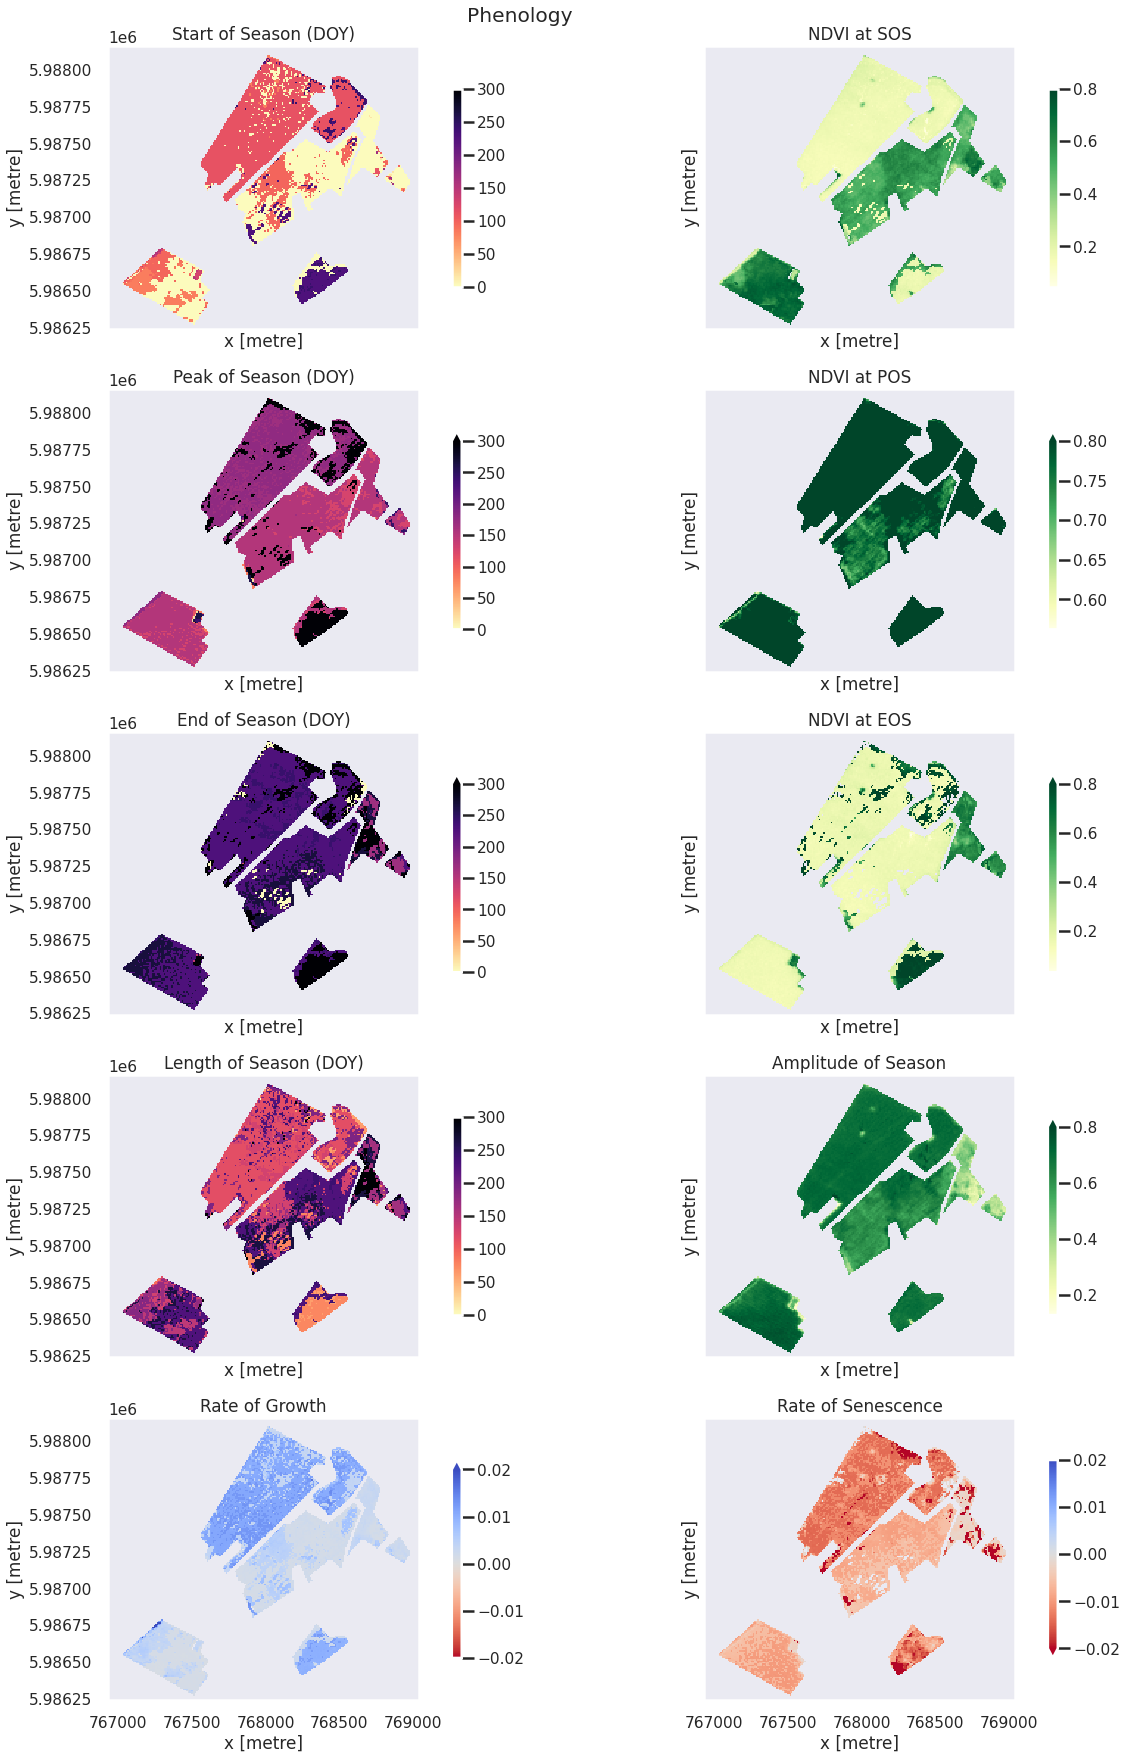

In [56]:
import matplotlib.pyplot as plt
#select the year to plot

cbar_size = 0.5
phen = pheno_results

#mask again with crop-mask
phen = phen.where(field_raster != 0)

# set up figure
fig, ax = plt.subplots(nrows=5,
                       ncols=2,
                       figsize=(18, 25),
                       sharex=True,
                       sharey=True)

# set colorbar size
cbar_size = 0.7

# set aspect ratios
for a in fig.axes:
    a.set_aspect('equal')

# start of season
phen.SOS.plot(ax=ax[0, 0],
              cmap='magma_r',
              vmax=300,
              vmin=0,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[0, 0].set_title('Start of Season (DOY)')

phen.vSOS.plot(ax=ax[0, 1],
               cmap='YlGn',
               vmax=0.8,
               cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[0, 1].set_title('NDVI at SOS')

# peak of season
phen.POS.plot(ax=ax[1, 0],
              cmap='magma_r',
              vmax=300,
              vmin=0,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[1, 0].set_title('Peak of Season (DOY)')

phen.vPOS.plot(ax=ax[1, 1],
               cmap='YlGn',
               vmax=0.8,
               cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[1, 1].set_title('NDVI at POS')

# end of season
phen.EOS.plot(ax=ax[2, 0],
              cmap='magma_r',
              vmax=300,
              vmin=0,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[2, 0].set_title('End of Season (DOY)')

phen.vEOS.plot(ax=ax[2, 1],
               cmap='YlGn',
               vmax=0.8,
               cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[2, 1].set_title('NDVI at EOS')

# Length of Season
phen.LOS.plot(ax=ax[3, 0],
              cmap='magma_r',
              vmax=300,
              vmin=0,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[3, 0].set_title('Length of Season (DOY)')

# Amplitude
phen.AOS.plot(ax=ax[3, 1],
              cmap='YlGn',
              vmax=0.8,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[3, 1].set_title('Amplitude of Season')

# rate of growth
phen.ROG.plot(ax=ax[4, 0],
              cmap='coolwarm_r',
              vmin=-0.02,
              vmax=0.02,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[4, 0].set_title('Rate of Growth')

# rate of Sensescence
phen.ROS.plot(ax=ax[4, 1],
              cmap='coolwarm_r',
              vmin=-0.02,
              vmax=0.02,
              cbar_kwargs=dict(shrink=cbar_size, label=None))
ax[4, 1].set_title('Rate of Senescence')
plt.suptitle('Phenology')
plt.tight_layout();

In [79]:
ds_s1 = dualpol_indices(ds_s1, index='RVI')
ds_s1

<xarray.Dataset>
Dimensions:      (time: 139, y: 192, x: 211)
Coordinates:
  * time         (time) datetime64[ns] 2021-05-02T05:16:04 ... 2021-12-30T17:...
  * y            (y) float64 5.988e+06 5.988e+06 ... 5.986e+06 5.986e+06
  * x            (x) float64 7.669e+05 7.669e+05 7.67e+05 ... 7.69e+05 7.69e+05
    spatial_ref  int32 32632
Data variables:
    vv           (time, y, x) float32 -11.4 -11.74 -12.29 ... -8.482 -8.482
    vh           (time, y, x) float32 -25.27 -24.64 -23.63 ... -13.36 -13.36
    RVI          (time, y, x) float32 2.757 2.709 2.631 ... 2.451 2.447 2.447
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

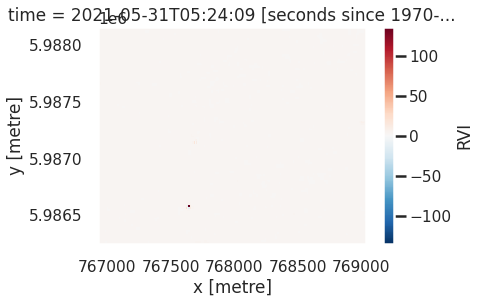

In [86]:
ds_s1.RVI.isel(time=9).plot()